In [2]:
# import libraries we need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the excel file
df = pd.read_excel(r"C:\Users\Oscar_On\Downloads\Group Project Data-SFD Data-Toronto Police.xlsx")

In [4]:
# see the description of the data
df.describe(include='all')

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707,5707,5707.000000,5707,5707,5707.000000,5707.000000,...,5707,5707,5707.000000,5707.000000,5707.0,5707,5707.0,5707,5707.000000,5707.000000
unique,NaN,NaN,NaN,5707,3579,NaN,12,7,NaN,NaN,...,4,17,NaN,NaN,159.0,159,140.0,140,NaN,NaN
top,NaN,NaN,NaN,GO-2004397105,2019/08/05 04:00:00+00,NaN,August,Sunday,NaN,NaN,...,Evening,D31,NaN,NaN,25.0,Glenfield-Jane Heights,25.0,Glenfield-Jane Heights (25),NaN,NaN
freq,NaN,NaN,NaN,1,9,NaN,604,995,NaN,NaN,...,2307,998,NaN,NaN,311.0,311,304.0,304,NaN,NaN
mean,-79.481115,43.244138,2854.000000,NaN,NaN,2014.460662,NaN,NaN,187.198178,15.901174,...,NaN,NaN,0.122481,0.488172,NaN,NaN,NaN,NaN,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,NaN,NaN,5.468803,NaN,NaN,100.269326,8.819631,...,NaN,NaN,0.349599,0.779148,NaN,NaN,NaN,NaN,0.640212,4.532671
min,-85.488744,0.000000,1.000000,NaN,NaN,2004.000000,NaN,NaN,1.000000,1.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,NaN,NaN,2010.000000,NaN,NaN,106.000000,8.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,NaN,NaN,2016.000000,NaN,NaN,192.000000,16.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,NaN,NaN,2019.000000,NaN,NaN,268.000000,23.000000,...,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,-79.328082,43.755306


In [5]:
# drop all the rows with missing values
df_clean = df.drop(df[df['HOOD_158']== "NSA"].index)

# reset all the index
df_clean.reset_index(drop=True, inplace=True)

# show df info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5643 non-null   float64
 1   Y                  5643 non-null   float64
 2   OBJECTID           5643 non-null   int64  
 3   EVENT_UNIQUE_ID    5643 non-null   object 
 4   OCC_DATE           5643 non-null   object 
 5   OCC_YEAR           5643 non-null   int64  
 6   OCC_MONTH          5643 non-null   object 
 7   OCC_DOW            5643 non-null   object 
 8   OCC_DOY            5643 non-null   int64  
 9   OCC_DAY            5643 non-null   int64  
 10  OCC_HOUR           5643 non-null   int64  
 11  OCC_TIME_RANGE     5643 non-null   object 
 12  DIVISION           5643 non-null   object 
 13  DEATH              5643 non-null   int64  
 14  INJURIES           5643 non-null   int64  
 15  HOOD_158           5643 non-null   object 
 16  NEIGHBOURHOOD_158  5643 

In [6]:
# drop duplicated rows
df_clean.drop_duplicates()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5639,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5640,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5641,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [7]:
# drop columns 
df_clean = df_clean.drop(['X','Y','OBJECTID','EVENT_UNIQUE_ID','LONG_WGS84','LAT_WGS84','HOOD_140','NEIGHBOURHOOD_140'],axis =1)

In [8]:
# combine death and injuries column
df_clean['Death and Injuries'] = df_clean['DEATH'] + df_clean['INJURIES']
df_clean

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,Death and Injuries
0,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,0
1,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,0
2,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,2
3,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,1
4,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,1
5639,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,2
5640,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,0
5641,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,2


<Axes: >

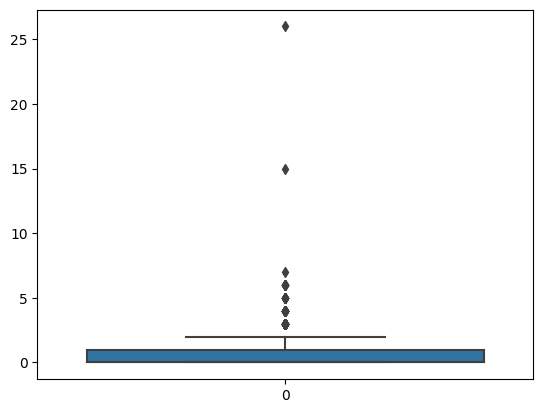

In [9]:
# show the distribution of the 'Death and Injuries' column
sns.boxplot(data=df_clean['Death and Injuries'])
